In [41]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import sys
import os
import pickle 

# Add the 'src' directory to the Python path
sys.path.append(os.path.abspath(r'C:\Users\xelor\Downloads\E2E ML project\src'))

# Now you should be able to import from 'src'
from preprocess import identify_tweet_language, preprocess, normalize_arabizi


In [17]:
df = pd.read_csv(r'C:\Users\xelor\Downloads\E2E ML project\scrapped_data\scrapped_comments.csv')
df

,comments,polarity
0,عواشر مبروكه خويا العزيز والدخل عليك بالصحه وا...,NaN
1,Khoya marhba hawl tzid kaliti video lah iwaf9,NaN
2,خوة الله يرحم ليكم لوالدين لما شجعوني بشي ابون...,NaN
3,الله يسعد مساءك بالهنا والراحة وبصحة الله يفرحك,NaN
4,هاد الحاولي ميت من شحال هاديبقاو غي تصاور ديال...,NaN
5,7awli ma fham walo,NaN
6,تلعب اولدي شحال من واحد قاتلووو المطور فوق الحولي,NaN
7,Khoya marehaba bghibake tareja3e kifema lawale...,NaN
8,An lwale,NaN
9,بسم الله الرحمن الرحيم ماشاء الله تبارك الله ل...,NaN


In [18]:
df.info

<bound method DataFrame.info of                                              comments  polarity
0   عواشر مبروكه خويا العزيز والدخل عليك بالصحه وا...       NaN
1       Khoya marhba hawl tzid kaliti video lah iwaf9       NaN
2   خوة الله يرحم ليكم لوالدين لما شجعوني بشي ابون...       NaN
3     الله يسعد مساءك بالهنا والراحة وبصحة الله يفرحك       NaN
4   هاد الحاولي ميت من شحال هاديبقاو غي تصاور ديال...       NaN
5                                 7awli ma fham walo        NaN
6   تلعب اولدي شحال من واحد قاتلووو المطور فوق الحولي       NaN
7   Khoya marehaba bghibake tareja3e kifema lawale...       NaN
8                                           An lwale        NaN
9   بسم الله الرحمن الرحيم ماشاء الله تبارك الله ل...       NaN
10         تحاتي خويا مرحبا رجع لمغامرات ديما كتفرجنا       NaN
11                                          وامي كرشي       NaN
12  شحال من واحد كيشوف هاد تعليق بعت تشوف ممتك في ...       NaN
13                                            ml3ouba       NaN
14      

In [22]:
df["comments"].isna().sum()

1

In [23]:
df = df.dropna(subset=['comments'])

In [24]:
df["comments"].isna().sum()

0

In [26]:
# Identify the language of each comment
df = identify_tweet_language(df, src_field='comments')
df.head()

,comments,polarity,language
0,عواشر مبروكه خويا العزيز والدخل عليك بالصحه وا...,NaN,Arabic
1,Khoya marhba hawl tzid kaliti video lah iwaf9,NaN,Arabizi
2,خوة الله يرحم ليكم لوالدين لما شجعوني بشي ابون...,NaN,Arabic
3,الله يسعد مساءك بالهنا والراحة وبصحة الله يفرحك,NaN,Arabic
4,هاد الحاولي ميت من شحال هاديبقاو غي تصاور ديال...,NaN,Arabic


In [36]:
language_counts = df["language"].value_counts()
language_counts

language
Arabic     14
Arabizi     8
Name: count, dtype: int64

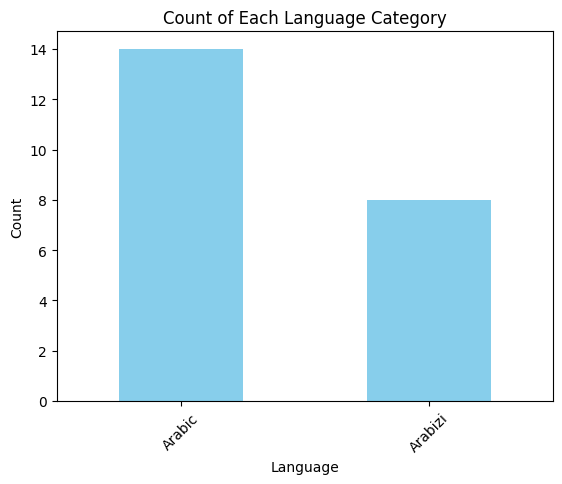

In [37]:
# Create a bar plot for language counts
language_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Each Language Category')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [38]:
df.head()

,comments,polarity,language
0,عواشر مبروكه خويا العزيز والدخل عليك بالصحه وا...,NaN,Arabic
1,Khoya marhba hawl tzid kaliti video lah iwaf9,NaN,Arabizi
2,خوة الله يرحم ليكم لوالدين لما شجعوني بشي ابون...,NaN,Arabic
3,الله يسعد مساءك بالهنا والراحة وبصحة الله يفرحك,NaN,Arabic
4,هاد الحاولي ميت من شحال هاديبقاو غي تصاور ديال...,NaN,Arabic


In [39]:
df.drop(columns=['polarity'], inplace=True)

In [40]:
df.head()

,comments,language
0,عواشر مبروكه خويا العزيز والدخل عليك بالصحه وا...,Arabic
1,Khoya marhba hawl tzid kaliti video lah iwaf9,Arabizi
2,خوة الله يرحم ليكم لوالدين لما شجعوني بشي ابون...,Arabic
3,الله يسعد مساءك بالهنا والراحة وبصحة الله يفرحك,Arabic
4,هاد الحاولي ميت من شحال هاديبقاو غي تصاور ديال...,Arabic


In [42]:
# Load the normalization dictionary
dict_path = r"C:\Users\xelor\Downloads\E2E ML project\dict\doda_vocab_dict.pkl"
with open(dict_path, 'rb') as f:
    normalize_dict = pickle.load(f)

# Assuming your DataFrame is named 'df' and the comments column is named 'comments'
# Apply normalization
df['normalized_comments'] = df['comments'].apply(
    lambda x: normalize_arabizi(x, normalize_dict) if isinstance(x, str) else x
)

In [43]:
df.head()

,comments,language,normalized_comments
0,عواشر مبروكه خويا العزيز والدخل عليك بالصحه وا...,Arabic,عواشر مبروكه خويا العزيز والدخل عليك بالصحه وا...
1,Khoya marhba hawl tzid kaliti video lah iwaf9,Arabizi,Khoya marhba hawl tzid kaliti video allah iwaf9
2,خوة الله يرحم ليكم لوالدين لما شجعوني بشي ابون...,Arabic,خوة الله يرحم ليكم لوالدين لما شجعوني بشي ابون...
3,الله يسعد مساءك بالهنا والراحة وبصحة الله يفرحك,Arabic,الله يسعد مساءك بالهنا والراحة وبصحة الله يفرحك
4,هاد الحاولي ميت من شحال هاديبقاو غي تصاور ديال...,Arabic,هاد الحاولي ميت من شحال هاديبقاو غي تصاور ديال...


In [44]:
normalize_dict

{'(in)definite': [['rajl', 'rrajl'],
  ['klb', 'lklb'],
  ['minjara', 'lminjara'],
  ['sbbat', 'ssbbat'],
  ['korsi', 'lkorsi'],
  ['98wa', 'l98wa'],
  ['insan', 'l2insan'],
  ['oukla', 'l2oukla'],
  ['a7lam', 'l2a7lam'],
  ['srwal', 'ssrwal'],
  ['tbla', 'ttbla'],
  ['kas', 'lkas'],
  ['ma', 'lma'],
  ['8wa', 'l8wa'],
  ['9r3a', 'l9r3a'],
  ['dar', 'ddar'],
  ['bit', 'lbit'],
  ['mdrasa', 'lmdrasa'],
  ['tomobil', 'ttomobil'],
  ['motor', 'lmotor'],
  ['chffar', 'chchffar'],
  ['chjra', 'chchjra'],
  ['3imara', 'l3imara'],
  ['partma', 'lpartma'],
  ['jrda', 'jjrda'],
  ['n3as', 'nn3as'],
  ['wld', 'lwld'],
  ['bnt', 'lbnt'],
  ['pikala', 'lppikala'],
  ['tobis', 'ttobis'],
  ['chari3', 'chchari3'],
  ['drb', 'ddrb'],
  ['7ouma', 'l7ouma'],
  ['drouj', 'ddrouj'],
  ['ferrouj', 'lferrouj'],
  ['nkhla', 'nnkhla'],
  ['lougha', 'llougha'],
  ['3am', 'l3am'],
  ['fakhour', 'lfakhour'],
  ['yom', 'lyom'],
  ['namousia', 'nnamousia'],
  ['se8d', 'sse8d'],
  ['3aada', 'l3aada'],
  ['ntikhaba

In [49]:
pd.set_option('display.max_columns', None)  # or specify a number if you want to limit it
pd.set_option('display.max_colwidth', None)  # to see full content of each column

df[df['language'] == 'Arabizi'][["comments", "normalized_comments"]]

,comments,normalized_comments
1,Khoya marhba hawl tzid kaliti video lah iwaf9,Khoya marhba hawl tzid kaliti video allah iwaf9
5,7awli ma fham walo,7awel ma fhem walo
7,Khoya marehaba bghibake tareja3e kifema lawale ochokeran,Khoya marehaba bghibake tareja3e kifema lawale ochokeran
8,An lwale,An lwale
13,ml3ouba,ml3ouba
15,Vidio 9dim,Vidio 9dim
16,Salam cv,Salam cv
20,Sahb YouTube kamlin labs in jlaba 3lc ? Hhhhh Wla machin tnsbo 3la kasba,Sahb YouTube kaml labs in jlaba 3lc ? Hhhhh Wla machin tnsbo 3la kasba


In [54]:
df_processed = preprocess(src_df=df, source='comments', field='normalized_comments', d=normalize_dict, arabizi=True)
df_processed[df_processed['language'] == 'Arabizi'][["comments", "normalized_comments"]]

,comments,normalized_comments
1,Khoya marhba hawl tzid kaliti video lah iwaf9,khouya marhba hawl tzid kaliti video allah iwaf
5,7awli ma fham walo,awli ma fhem walo
7,Khoya marehaba bghibake tareja3e kifema lawale ochokeran,khouya marehaba bghibake tarejae kifema lawale ochokeran
8,An lwale,an lwale
13,ml3ouba,mlouba
15,Vidio 9dim,vidio dim
16,Salam cv,salam cv
20,Sahb YouTube kamlin labs in jlaba 3lc ? Hhhhh Wla machin tnsbo 3la kasba,sa7b youtube kaml labs in jlaba lc wla machin tnsbo lla kasba
